In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
original_df = pd.read_csv('./311-DSNY-20151017.csv')

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576487 entries, 0 to 576486
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      576487 non-null  int64  
 1   Created Date                    576487 non-null  object 
 2   Closed Date                     570242 non-null  object 
 3   Agency                          576487 non-null  object 
 4   Agency Name                     576487 non-null  object 
 5   Complaint Type                  576487 non-null  object 
 6   Descriptor                      576487 non-null  object 
 7   Location Type                   567793 non-null  object 
 8   Incident Zip                    563201 non-null  float64
 9   Incident Address                488832 non-null  object 
 10  Street Name                     488832 non-null  object 
 11  Cross Street 1                  435445 non-null  object 
 12  Cross Street 2  

In [5]:
# drop the all-null columns
df = original_df.drop(['Landmark', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'], axis=1)

# examine categorical columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576487 entries, 0 to 576486
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      576487 non-null  int64  
 1   Created Date                    576487 non-null  object 
 2   Closed Date                     570242 non-null  object 
 3   Agency                          576487 non-null  object 
 4   Agency Name                     576487 non-null  object 
 5   Complaint Type                  576487 non-null  object 
 6   Descriptor                      576487 non-null  object 
 7   Location Type                   567793 non-null  object 
 8   Incident Zip                    563201 non-null  float64
 9   Incident Address                488832 non-null  object 
 10  Street Name                     488832 non-null  object 
 11  Cross Street 1                  435445 non-null  object 
 12  Cross Street 2  

In [7]:
df['Agency'].unique()

array(['DSNY'], dtype=object)

In [8]:
df = df.drop(['Agency'], axis=1) #drop as there's only one value

In [9]:
df['Agency Name'].unique().size

43

In [10]:
df['Complaint Type'].unique()

array(['Graffiti', 'Snow', 'Litter Basket / Request', 'Dirty Conditions',
       'Sanitation Condition', 'Sweeping/Missed', 'Derelict Vehicles',
       'Vacant Lot', 'Adopt-A-Basket', 'Other Enforcement',
       'Missed Collection (All Materials)', 'Sweeping/Inadequate',
       'Collection Truck Noise', 'Recycling Enforcement',
       'Overflowing Litter Baskets', 'Derelict Bicycle',
       'Overflowing Recycling Baskets', 'Foam Ban Enforcement',
       'Sweeping/Missed-Inadequate', 'Request Xmas Tree Collection',
       'Electronics Waste', 'Request Large Bulky Item Collection',
       'Electronics Waste Appointment'], dtype=object)

In [11]:
df['Descriptor'].unique().size

62

In [12]:
df['Location Type'].unique()

array([nan, 'Street', 'Sidewalk', 'Lot', 'Residential', 'Other',
       'Comercial', 'Mixed Use'], dtype=object)

In [13]:
df['Incident Zip'].unique().size

216

In [14]:
# drop as this is a "categorical" column represented in float, 
# and it has too many unique values, if we have powerful machine and enough time we may keep it
df = df.drop(['Incident Zip'], axis=1) 

In [15]:
df['City'].unique()

array([nan, 'BROOKLYN', 'BRONX', 'STATEN ISLAND', 'NEW YORK', 'Maspeth',
       'QUEENS', 'Jamaica', 'Astoria', 'Hollis', 'Howard Beach',
       'Flushing', 'Fresh Meadows', 'Saint Albans', 'Elmhurst',
       'Ridgewood', 'Woodside', 'Bayside', 'East Elmhurst', 'Rego Park',
       'Long Island City', 'Springfield Gardens', 'College Point',
       'Forest Hills', 'Little Neck', 'Richmond Hill', 'Middle Village',
       'Ozone Park', 'Bellerose', 'Glen Oaks', 'Jackson Heights',
       'South Richmond Hill', 'Far Rockaway', 'Cambria Heights',
       'Rosedale', 'Arverne', 'Whitestone', 'Woodhaven', 'Corona',
       'Queens Village', 'Rockaway Park', 'Floral Park',
       'South Ozone Park', 'Sunnyside', 'Kew Gardens', 'Oakland Gardens',
       'Breezy Point', 'New Hyde Park'], dtype=object)

In [16]:
df['Facility Type'].unique()

array([nan, 'DSNY Garage'], dtype=object)

In [17]:
df = df.drop(['Facility Type'], axis=1) #drop as there's only one value

In [18]:
df['Status'].unique()

array(['Open', 'Closed', 'Pending', 'Assigned'], dtype=object)

In [19]:
df['Resolution Description'].unique().size

72

In [20]:
df['Community Board'].unique().size

78

In [21]:
df['Borough'].unique()

array(['BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND', 'MANHATTAN', nan,
       'Unspecified'], dtype=object)

In [22]:
df['Open Data Channel Type'].unique()

array(['OTHER', 'PHONE', 'ONLINE', 'UNKNOWN', 'MOBILE'], dtype=object)

In [23]:
df['Park Borough'].unique()

array(['BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND', 'MANHATTAN', nan,
       'Unspecified'], dtype=object)

In [24]:
df['Park Facility Name'].unique()

array(['Unspecified'], dtype=object)

In [25]:
df = df.drop(['Park Facility Name'], axis=1) #drop as there's only one value

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576487 entries, 0 to 576486
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      576487 non-null  int64  
 1   Created Date                    576487 non-null  object 
 2   Closed Date                     570242 non-null  object 
 3   Agency Name                     576487 non-null  object 
 4   Complaint Type                  576487 non-null  object 
 5   Descriptor                      576487 non-null  object 
 6   Location Type                   567793 non-null  object 
 7   Incident Address                488832 non-null  object 
 8   Street Name                     488832 non-null  object 
 9   Cross Street 1                  435445 non-null  object 
 10  Cross Street 2                  413476 non-null  object 
 11  Intersection Street 1           84745 non-null   object 
 12  Intersection Str

In [ ]:
# drop all the address related columns due to different types used
# it's hard to normalize

In [27]:
df = df.drop(df.columns[7:13], axis=1)
df = df.drop(['Address Type'], axis=1)

In [28]:
df[['Latitude', 'Longitude', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'BBL']].tail()

,Latitude,Longitude,X Coordinate (State Plane),Y Coordinate (State Plane),BBL
576482,40.694133,-73.964144,994193.0,192170.0,3.018930e+09
576483,40.653129,-73.956104,996430.0,177232.0,3.050838e+09
576484,40.677703,-73.760024,1050813.0,186273.0,4.129970e+09
576485,40.728623,-73.720484,1061721.0,204857.0,4.086370e+09
576486,40.712641,-73.800154,1039653.0,198974.0,4.098470e+09


In [29]:
df = df.drop(['BBL', 'Latitude', 'Longitude', 'Location'], axis=1) #only keep (State Plane Coordinate ) as location 

In [30]:
df[df['Park Borough']!=df['Borough']].count()
#df[df['Park Borough']!=df['Borough']][['Park Borough', 'Borough']]

Unique Key                        1588
Created Date                      1588
Closed Date                       1588
Agency Name                       1588
Complaint Type                    1588
Descriptor                        1588
Location Type                     1588
City                                 0
Status                            1588
Due Date                             0
Resolution Description            1588
Resolution Action Updated Date    1588
Community Board                      0
Borough                              0
X Coordinate (State Plane)           0
Y Coordinate (State Plane)           0
Open Data Channel Type            1588
Park Borough                         0
dtype: int64

In [31]:
df = df.drop(['Park Borough'], axis=1) #drop as it is a dup to 'Borough'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576487 entries, 0 to 576486
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      576487 non-null  int64  
 1   Created Date                    576487 non-null  object 
 2   Closed Date                     570242 non-null  object 
 3   Agency Name                     576487 non-null  object 
 4   Complaint Type                  576487 non-null  object 
 5   Descriptor                      576487 non-null  object 
 6   Location Type                   567793 non-null  object 
 7   City                            563252 non-null  object 
 8   Status                          576487 non-null  object 
 9   Due Date                        42560 non-null   object 
 10  Resolution Description          527244 non-null  object 
 11  Resolution Action Updated Date  574641 non-null  object 
 12  Community Board 

In [33]:
df[df['Due Date'].notnull()][['Created Date', 'Due Date', 'Closed Date']].head()

,Created Date,Due Date,Closed Date
557,04/15/2015 11:18:30 AM,06/27/2015 10:29:08 AM,09/24/2015 12:00:00 AM
876,06/24/2015 01:23:48 PM,08/14/2015 03:09:43 PM,09/03/2015 12:00:00 AM
1147,08/05/2015 10:27:06 AM,09/16/2015 11:08:34 AM,NaN
1325,09/01/2015 03:12:17 PM,10/08/2015 11:29:24 AM,09/23/2015 12:00:00 AM
1633,11/01/2015 01:44:59 AM,12/10/2015 10:38:28 AM,02/23/2016 12:00:00 AM


In [34]:
# drop Due Date as only less than 10% data has it
df = df.drop(['Due Date'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576487 entries, 0 to 576486
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      576487 non-null  int64  
 1   Created Date                    576487 non-null  object 
 2   Closed Date                     570242 non-null  object 
 3   Agency Name                     576487 non-null  object 
 4   Complaint Type                  576487 non-null  object 
 5   Descriptor                      576487 non-null  object 
 6   Location Type                   567793 non-null  object 
 7   City                            563252 non-null  object 
 8   Status                          576487 non-null  object 
 9   Resolution Description          527244 non-null  object 
 10  Resolution Action Updated Date  574641 non-null  object 
 11  Community Board                 574899 non-null  object 
 12  Borough         

# we now have our base dataframe

In [36]:
df1 = df[df['Closed Date'].notnull()]

In [37]:
df1 = df1[df1['Status']=='Closed']

In [38]:
df1 = df1[['Created Date', 'Closed Date', 'Complaint Type', 'Location Type', 'Borough']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567774 entries, 1 to 576486
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Created Date    567774 non-null  object
 1   Closed Date     567774 non-null  object
 2   Complaint Type  567774 non-null  object
 3   Location Type   561888 non-null  object
 4   Borough         566186 non-null  object
dtypes: object(5)
memory usage: 26.0+ MB


In [39]:
#df1['Complaint Type'].isnull().sum() #astype('category')
df1['Complaint'] = df1['Complaint Type'].astype('category')

In [40]:
df1['Location'] = df1['Location Type'].fillna('unknown').astype('category')

In [41]:
df1['Bor'] = df1['Borough'].fillna('unknown').astype('category')

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567774 entries, 1 to 576486
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Created Date    567774 non-null  object  
 1   Closed Date     567774 non-null  object  
 2   Complaint Type  567774 non-null  object  
 3   Location Type   561888 non-null  object  
 4   Borough         566186 non-null  object  
 5   Complaint       567774 non-null  category
 6   Location        567774 non-null  category
 7   Bor             567774 non-null  category
dtypes: category(3), object(5)
memory usage: 27.6+ MB


In [43]:
df1['Created'] = pd.to_datetime(df1['Created Date'])

In [44]:
df1['Closed'] = pd.to_datetime(df1['Closed Date'], errors = 'coerce') #there's an odd ball causing trouble

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567774 entries, 1 to 576486
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Created Date    567774 non-null  object        
 1   Closed Date     567774 non-null  object        
 2   Complaint Type  567774 non-null  object        
 3   Location Type   561888 non-null  object        
 4   Borough         566186 non-null  object        
 5   Complaint       567774 non-null  category      
 6   Location        567774 non-null  category      
 7   Bor             567774 non-null  category      
 8   Created         567774 non-null  datetime64[ns]
 9   Closed          567773 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](2), object(5)
memory usage: 36.3+ MB


In [46]:
df1 = df1[['Created', 'Closed', 'Bor', 'Location', 'Complaint']]

In [47]:
df1 = df1.dropna()

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567773 entries, 1 to 576486
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Created    567773 non-null  datetime64[ns]
 1   Closed     567773 non-null  datetime64[ns]
 2   Bor        567773 non-null  category      
 3   Location   567773 non-null  category      
 4   Complaint  567773 non-null  category      
dtypes: category(3), datetime64[ns](2)
memory usage: 14.6 MB


In [49]:
df1['duration']=df1['Closed']-df1['Created']

In [50]:
df1['hours'] = df1['duration']/np.timedelta64(1,'h')

In [51]:
df1.hours.describe()

count    5.677730e+05
mean     2.529571e+02
std      2.572750e+03
min      0.000000e+00
25%      2.260000e+01
50%      4.188333e+01
75%      9.360000e+01
max      1.614201e+06
Name: hours, dtype: float64

In [56]:
df1[df1.hours>100000]

,Created,Closed,Bor,Location,Complaint,duration,hours
216824,2015-11-03 16:55:10,2100-01-01,QUEENS,Residential,Graffiti,30739 days 07:04:50,7.377431e+05
432807,2017-06-01 13:25:35,2047-07-27,MANHATTAN,Mixed Use,Graffiti,11012 days 10:34:25,2.642986e+05
509943,2017-10-11 14:34:08,2201-12-05,QUEENS,Comercial,Graffiti,67258 days 09:25:52,1.614201e+06
529177,2017-11-02 15:20:00,2047-12-04,MANHATTAN,Mixed Use,Graffiti,10988 days 08:40:00,2.637207e+05


In [57]:
df1[df1.hours>1000].count()

Created      35369
Closed       35369
Bor          35369
Location     35369
Complaint    35369
duration     35369
hours        35369
dtype: int64

In [58]:
df1=df1[df1.hours!=0] #ignore immediately closed; 

In [62]:
df1=df1[(df1.hours<1000)] #ignore those took longer than 1000 hour as anomaly

In [63]:
#df1.info()
#df1.describe()
df1.head()

,Created,Closed,Bor,Location,Complaint,duration,hours
1,2015-01-07 08:17:00,2015-01-07 12:00:00,QUEENS,Street,Snow,0 days 03:43:00,3.716667
2,2015-01-19 17:00:00,2015-01-21 12:00:00,QUEENS,Sidewalk,Litter Basket / Request,1 days 19:00:00,43.000000
3,2015-01-22 09:21:00,2015-01-31 12:00:00,QUEENS,Sidewalk,Dirty Conditions,9 days 02:39:00,218.650000
4,2015-01-02 06:11:00,2015-01-05 12:00:00,BRONX,Sidewalk,Sanitation Condition,3 days 05:49:00,77.816667
5,2015-01-02 09:57:00,2015-01-05 12:00:00,BROOKLYN,Sidewalk,Sweeping/Missed,3 days 02:03:00,74.050000


<AxesSubplot:title={'center':'hours'}, ylabel='Frequency'>

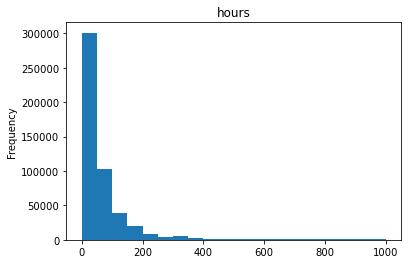

In [65]:
df1.hours.plot(kind='hist', bins=20, title='hours') #long tail observed

In [106]:
df1['c_month']=pd.DatetimeIndex(df1.Created).month

In [103]:
df1['c_weekday']=pd.DatetimeIndex(df1.Created).weekday

In [104]:
df1['c_hour']=pd.DatetimeIndex(df1.Created).hour

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
bor_dummies = pd.get_dummies(df1.Bor)

In [68]:
location_dummies = pd.get_dummies(df1.Location)

In [69]:
compalint_dummies = pd.get_dummies(df1.Complaint)

In [108]:
merged = pd.concat([df1[['hours', 'c_weekday', 'c_hour', 'c_month']] , bor_dummies, location_dummies, compalint_dummies], axis='columns')

In [109]:
merged['log_hours'] = np.log(merged.hours)

In [110]:
merged[['log_hours', 'hours']].head()

,log_hours,hours
1,1.312827,3.716667
2,3.761200,43.000000
3,5.387472,218.650000
4,4.354356,77.816667
5,4.304741,74.050000


In [125]:
#y = merged.hours.values
y = merged.log_hours.values

In [126]:
X = merged.drop(['hours', 'log_hours'], axis=1).values

In [127]:
# split the data into train and test with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [128]:
# create a linear regression model in Keras
# with the appropriate number of inputs and output
model = Sequential()
model.add(Dense(1, input_shape=(41,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [129]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [133]:
# train the model on the training set and check its accuracy on training and test set
model.fit(X_train, y_train, batch_size=30000, epochs=10)

Train on 395276 samples
Epoch 1/10
395276/395276 [==============================] - 0s 1us/sample - loss: 1.2988
Epoch 2/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.1787
Epoch 3/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.1503
Epoch 4/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.1160
Epoch 5/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.6599
Epoch 6/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.4759
Epoch 7/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.2737
Epoch 8/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.4177
Epoch 9/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.1541
Epoch 10/10
395276/395276 [==============================] - 0s 0us/sample - loss: 1.1403


In [135]:
from sklearn.metrics import r2_score

In [136]:
# check the R2score on training and test set (not good)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.173
The R2 score on the Test set is:	0.170


# maybe we can try time series?

In [137]:
df1 = df1.sort_values(by='Created')

<AxesSubplot:xlabel='Created'>

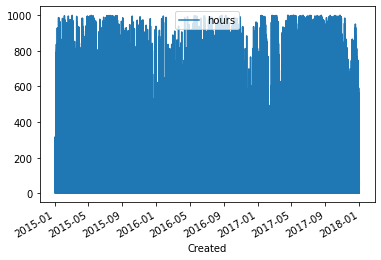

In [138]:
df1.plot(x='Created', y='hours')

In [142]:
df_ts = df1[['Created', 'hours']].set_index('Created')# [['Created', 'hours']].astype('float32')

In [147]:
dataset = df_ts.values
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


331043 163052


In [151]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [152]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [153]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

not able to run below; 
doube it's going to be good anyway;
maybe separate into multiple series by Complait Type, and then do ts prediction separately?

In [158]:
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)